In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import h5py

In [2]:
# sp.integrate.odeint

In [3]:
Nt=8

In [52]:
Ns=32

# mass="0p1000"
# ibeta_m = 0
# ibeta_M = 830

mass="0p2000"
ibeta_m = 775
ibeta_M = 816
nbeta = 9


# mass="0p3000"
# ibeta_m = 300
# ibeta_M = 700

# mass="0p4000"
# ibeta_m = 400
# ibeta_M = 1000

In [53]:
# Ns=24

# # mass="0p1000"
# # ibeta_m = 0
# # ibeta_M = 830

# # mass="0p2000"
# # ibeta_m = 768
# # ibeta_M = 880

# mass="0p3000"
# ibeta_m = 350
# ibeta_M = 700

# mass="0p4000"
# ibeta_m = 500
# ibeta_M = 1000

In [54]:
# Ns=16

# # mass="0.1"
# # ibeta_m = 0
# # ibeta_M = 830

# mass="0.2"
# ibeta_m = 300
# ibeta_M = 450

# mass="0.3"
# ibeta_m = 0
# ibeta_M = 200

# mass="0.4"
# ibeta_m = 100
# ibeta_M = 300

In [55]:
ibetas=np.arange(0, 1001)

In [56]:
directory = "fit_params_"+str(Ns)+"c_m"+mass+"/"
directory2 = "/mnt/hdd_barracuda/llnl/reweight/data/"+str(Ns)+"b_v14/"
f = h5py.File(directory2+"/m"+mass+"avghist_ibx"+str(0)+"_iby"+str(0)+"_nojkmeas.bin", 'r')
betas = f['beta'][()]
f.close()

In [57]:
lis_=[]

for ibeta in ibetas:
    tmp = np.loadtxt( directory+"minima_data_"+str(ibeta)+".dat" )
    lis_.append(tmp)

lis = np.array(lis_)

In [58]:
ibetac = np.argmin( ( (lis.T[2]- lis.T[3])**2 )[ibeta_m:ibeta_M] ) + ibeta_m

In [59]:
lis

array([[ 0.04487361,  0.04487361, -0.07873646, -0.07873646],
       [ 0.04486083,  0.04486083, -0.0787614 , -0.0787614 ],
       [ 0.04484794,  0.04484794, -0.07878632, -0.07878632],
       ...,
       [ 0.27994645,  0.27994645, -0.07975984, -0.07975984],
       [ 0.28019786,  0.28019786, -0.07978216, -0.07978216],
       [ 0.28044754,  0.28044754, -0.07980438, -0.07980438]])

In [60]:
np.argmin( (betas-10.945)**2 )

300

In [61]:
np.argmin(betas-10.945)

0

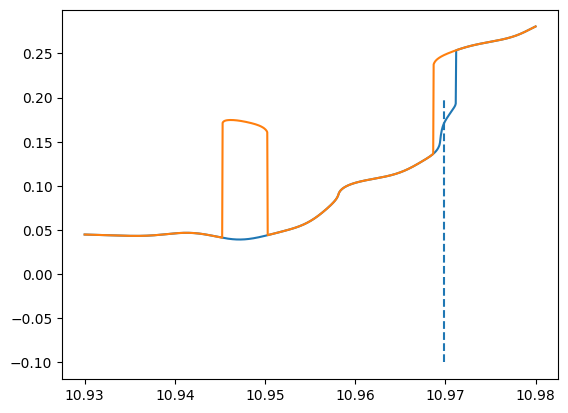

In [62]:
plt.plot( betas, lis.T[0])
plt.plot( betas, lis.T[1] )
plt.vlines( (betas[ibetac]), -0.1, 0.2, ls='dashed' )

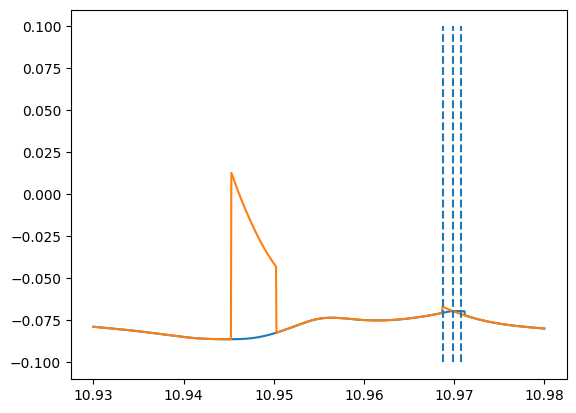

In [63]:
plt.plot( betas, lis.T[2])
plt.plot( betas, lis.T[3] )
plt.vlines( (betas[ibeta_m], betas[ibeta_M]), -0.1, 0.1, ls='dashed' )
plt.vlines( (betas[ibetac]), -0.1, 0.1, ls='dashed' )

In [64]:
ibeta_m, ibetac, ibeta_M

(775, 797, 816)

In [65]:
np.savetxt( "betac_ibetac_mass"+mass+"_"+str(Ns)+".dat", [betas[ibetac], ibetac] )
np.savetxt( "betas_mass"+mass+"_"+str(Ns)+".dat", betas )
# np.savetxt( "minima_data_mass"+mass+"_"+str(Ns)+".dat", lis )